# Making a map using the on-demand mapping services for a basemap and super-imposing some data

## Background 

The most familiar mapping services are those we often use to navigate with our phones for example: google maps. The difference between google maps and many of the examples we have looked at so far is that we do not download data in advance, process it and then create a map. Instead we have access to data when we need it and a a _relevant_ resolution. If we want to make a global map that is 1000 pixels across then Australia is probably just a few dozen pixels wide. If we instead decide to make a map to navigate across Melbourne, then a much higher resolution is needed _but only within the boundary of the map_. 

`Cartopy` provides access to various of the online mapping services that will serve image data on demand in the form of small image tiles at a specified resolution. The tools automatically query the service and assemble the tiles to make the map but there are some tricks that we need to know before we can use them.

## Exercise

This notebook is a template that needs to have some functions defined that it can use to plot the map.

Your job is to provide those functions so that this notebook will work. You are not going to change this notebook at all !

In [11]:
from src.dependencies import *
from src.my_functions import *

In [12]:
display_markdown(my_documentation(), raw=True)

   

This my_functions.py module contains all the functions that will make MapMaker.ipynb work properly. 

The user needs to specify the region, resolution and basemap of interest as inputs. 

In general, the functions in this module is organised based on different types of features to be put on the map. 

It includes: 

1) geographical features: my_coastlines and my_water_features that take requested resolution as a parameter to generate map features. 

2) graphical features: my_basemaps, download_raster_data, and my_global_raster_data output corresponding map graphics. 

3) point features: download_point_data and my_point_data output the regional seismicity as point-like representation on the map. 



## The code !

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Specify a region of interest

lat0 =  30  ; lat1 = 40
lon0 =  -123; lon1 = -113

map_extent = [lon0, lon1, lat0, lat1]
basemap_name = "mapbox_outdoors"

In [15]:
coastline = my_coastlines("10m")
water_features = my_water_features("50m")

In [16]:
map_tiles_dictionary = my_basemaps()

In [17]:
point_data = my_point_data(map_extent)

print(point_data)

Point data: 370 events in catalogue
[[-1.19502167e+02  3.85126670e+01  7.40000000e+03  2.00000000e+00]
 [-1.19499833e+02  3.85075000e+01  7.45000000e+03  2.00000000e+00]
 [-1.15634833e+02  3.31400000e+01  5.78000000e+03  2.00000000e+00]
 ...
 [-1.16079900e+02  3.71300000e+01             nan  2.00000000e+00]
 [-1.16059900e+02  3.71100000e+01  0.00000000e+00  2.00000000e+00]
 [-1.18283400e+02  3.24429000e+01  8.00000000e+03  2.00000000e+00]]


In [18]:
raster = my_global_raster_data()

print(raster)

Cloudstore connection established
Remote and local file size both 21.99 MB, skipping - global_age_data.3.6.z.npz
[[[-180.         90.         55.569202]
  [-179.9        90.         55.56879 ]
  [-179.8        90.         55.568138]
  ...
  [ 179.8        90.         55.416157]
  [ 179.9        90.         55.416164]
  [ 180.         90.         55.41626 ]]

 [[-180.         89.9        55.370914]
  [-179.9        89.9        55.371075]
  [-179.8        89.9        55.361431]
  ...
  [ 179.8        89.9        55.363701]
  [ 179.9        89.9        55.363701]
  [ 180.         89.9        55.3643  ]]

 [[-180.         89.8        55.566631]
  [-179.9        89.8        55.547897]
  [-179.8        89.8        55.605961]
  ...
  [ 179.8        89.8        55.555347]
  [ 179.9        89.8        55.561535]
  [ 180.         89.8        55.566044]]

 ...

 [[-180.        -89.8              nan]
  [-179.9       -89.8              nan]
  [-179.8       -89.8              nan]
  ...
  [ 179.8  

In [9]:
## specify some shapefile data (?)

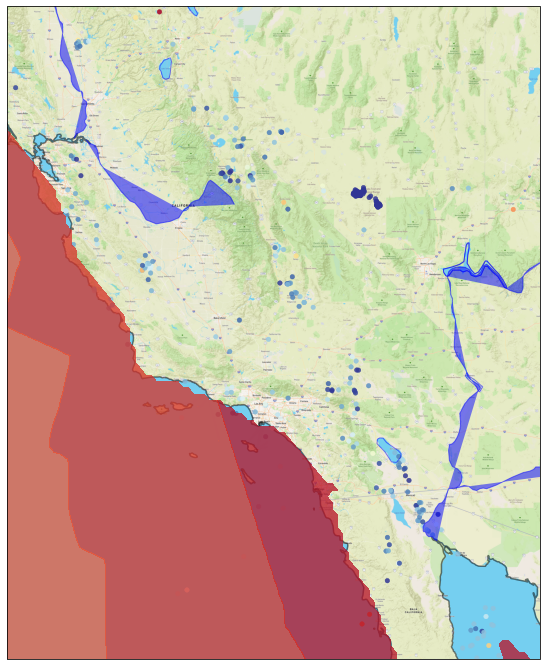

In [10]:
map_tiles = map_tiles_dictionary[basemap_name]

fig = plt.figure(figsize=(12, 12), facecolor="none")

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)

# Set the size of the map
ax.set_extent(map_extent)
# Add the on-demand image - the second argument is the resolution and needs to be balanced with the 
# size of the area the map covers. 

ax.add_image(map_tiles, 8)
ax.add_feature(coastline, linewidth=1.5,  edgecolor="Black", zorder=1, alpha=0.5)
for feature in water_features:
    ax.add_feature(feature,    linewidth=1.0,  edgecolor="Blue",  zorder=2, alpha=0.5)
    
## Add point data (lon, lat,colormapped variable, size variable)
ax.scatter(point_data[:,0], point_data[:,1], 10.0* point_data[:,3], c=point_data[:,2], marker='o', 
               cmap=cm.RdYlBu_r, alpha = 0.85, linewidth=0.5, transform=ccrs.Geodetic())


## Add raster data as contours

cf = ax.contourf(raster[...,0], raster[...,1], raster[...,2], 
         levels = np.arange(0.5,250,10), vmin=0, vmax=150,
         transform=ccrs.PlateCarree(),  cmap="RdYlBu",zorder=2, alpha=0.75)



In [11]:
fig.savefig("LA_Basin_Map.png", dpi=600)

See how well that worked by opening the [full-size image](./LA_Basin_Map.png). 

There really is a lot of detail available, but you can also see how long it takes to download and build the different resolutions. There is something of an art to finding the right balance. 

You may also find that very high resolution output results in memory errors. If so, restart the kernel and try again with a small image or lower dpi.